In [ ]:
# Important to work with tensorflow version 1
%tensorflow_version 1.x 
import tensorflow as tf
print(tf.__version__)

from keras import layers 
from keras import models
from keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

1.15.2


In [ ]:
from keras import layers 
from keras import models

from keras.datasets import mnist
from keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)) 
test_images = test_images.astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1))) 
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten()) 
model.add(layers.Dense(64, activation='relu')) 
model.add(layers.Dense(10, activation='softmax'))
model.summary()



Using TensorFlow backend.


11493376/11490434 [==============================] - 1s 0us/step
Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576

In [ ]:
model.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=2, batch_size=64)

Epoch 1/2
60000/60000 [==============================] - 42s 703us/step - loss: 0.0391 - accuracy: 0.9876
Epoch 2/2
60000/60000 [==============================] - 42s 700us/step - loss: 0.0287 - accuracy: 0.9913


In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
test_acc

10000/10000 [==============================] - 2s 248us/step


0.9901000261306763

## Google drive integration - Quick introduction

In [ ]:
! ls -l --block-size=MB # Command line code to run in terminal of vm

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

/content/drive/My Drive/datasets/cats_and_dogs_filtered.zip

In [ ]:
import os
import zipfile

local_zip = 'drive/My Drive/datasets/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/v1')
zip_ref.close()
# ! ls /tmp/cats_and_dogs_filtered/train/cats/

In [ ]:
import os, signal
os.kill(os.getpid(), signal.SIGKILL) # kill the virtal machine and all the directories and files saved in it.

In [ ]:
!kill -9 -1 # kill the virtal machine and all the directories and files saved in it.

# Cats and Dogs image classification
This is from the kaggle competition to classify dogs and cats based on their images. Google has a colab notebook explaining steps [here](https://colab.research.google.com/github/google/eng-edu/blob/master/ml/pc/exercises/image_classification_part1.ipynb#scrollTo=o-qUPyfO7Qr8) that can be referenced. This is a good introduction to [padding and stride](https://machinelearningmastery.com/padding-and-stride-for-convolutional-neural-networks/).

In [ ]:
# Downloading the dataset and storing in the tmp directory.
# All standart linux directories such as var, bin, lib, dev, srv, etc. can be used, however tmp is what is used for these purposes.

!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

import os
import zipfile

local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()
# ! ls /tmp/cats_and_dogs_filtered/train/cats/

--2020-07-10 04:50:14--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.216.128, 108.177.12.128, 172.217.204.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.216.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   124MB/s    in 0.5s    

2020-07-10 04:50:14 (124 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [ ]:
base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# os.mkdir('/tmp/cats_and_dogs_filtered/testingFolder') # Way to make a directory

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [ ]:
train_cat_fnames = os.listdir(train_cats_dir)
print(train_cat_fnames[:10])

train_dog_fnames = os.listdir(train_dogs_dir)
train_dog_fnames.sort()
print(train_dog_fnames[:10])

print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))

['cat.955.jpg', 'cat.776.jpg', 'cat.914.jpg', 'cat.467.jpg', 'cat.784.jpg', 'cat.868.jpg', 'cat.696.jpg', 'cat.606.jpg', 'cat.219.jpg', 'cat.687.jpg']
['dog.0.jpg', 'dog.1.jpg', 'dog.10.jpg', 'dog.100.jpg', 'dog.101.jpg', 'dog.102.jpg', 'dog.103.jpg', 'dog.104.jpg', 'dog.105.jpg', 'dog.106.jpg']
total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500


In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_cat_pix = [os.path.join(train_cats_dir, fname) for fname in train_cat_fnames[pic_index-8:pic_index]]
next_dog_pix = [os.path.join(train_dogs_dir, fname) for fname in train_dog_fnames[pic_index-8:pic_index]]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [ ]:
# Building the model
from keras import layers
from keras import models

model = models.Sequential() 
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3))) 
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2))) 
model.add(layers.Conv2D(128, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2))) 
model.add(layers.Conv2D(128, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2))) 
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu')) 
model.add(layers.Dense(1, activation='sigmoid'))

from keras import optimizers
model.compile(loss='binary_crossentropy', 
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')


In [ ]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps per epoch
      epochs=5,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps validation
      verbose=1)

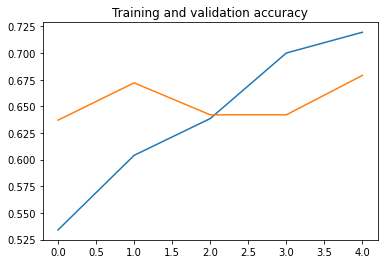

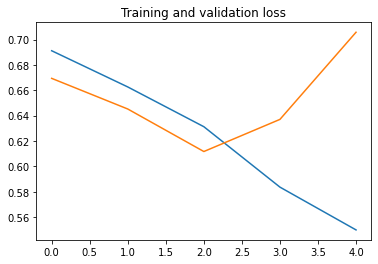

In [ ]:
# Retrieve a list of accuracy results on training and validation data
# sets for each training epoch
acc = history.history['acc']
val_acc = history.history['val_acc']

# Retrieve a list of list results on training and validation data
# sets for each training epoch
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')

plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')

model.save('cats_and_dogs_small_1.h5')


In [ ]:
# Generate predictions
print(model.predict(test_data[10:12])) # predictions for 2 samples
print(model.predict(test_data[[10]]))  # prediction for 1 sample. Note the double square brackets. 

In [ ]:
model.save('drive/My Drive/datasets/cats_and_dogs_small_1.h5') # Saving the model to drive
reconstructed_model = models.load_model('drive/My Drive/datasets/cats_and_dogs_small_1.h5') # It can be used to reconstruct the model identically.

### Taking care of overfitting of the model (by increasing training data set through image augmentation)


In [ ]:
# Building the model
model = models.Sequential() 
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3))) 
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2))) 
model.add(layers.Conv2D(128, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2))) 
model.add(layers.Conv2D(128, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2))) 
model.add(layers.Flatten()) 
model.add(layers.Dropout(0.5)) 
model.add(layers.Dense(512, activation='relu')) 
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

# Training the model (convnet) using data-augmentation generators (you rotate, zoom in, change height / width, flip, etc. randomly the images to create new images)
train_datagen = ImageDataGenerator(
    rescale=1./255, 
    rotation_range=40, 
    width_shift_range=0.2, 
    height_shift_range=0.2, 
    shear_range=0.2, 
    zoom_range=0.2, 
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255) # The validation dataset should never be augmented

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150), # resize all images to 150 x 150
    batch_size=32,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary') # Because we use binary_crossentropy loss, we need binary labels.

history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50)

model.save('cats_and_dogs_small_augmented.h5')

## Using pre-trained models to increase accuracy of models
The idea is to add a densely connected classifier on top of a the convulation base of a pre-trained model. There are a lot of fancy image-classification deep learning models that we can use. Some are already packaged with Keras as Xception, Inception V3, ResNet50, VGG16, VGG19, MobileNet. 

1.   We can extract the features i.e. use teh weights of the conv-base and process each image using numpy and then pass these images with only a densely connected network and that will beat our previous CNN. This can't support image augmentation though. But this is very fast and can run over CPU in short time.
2.   We can stack our dense layer network on top of the conv-base of a pre-trained model. The pre-trained base layers weights needs to be frozen to avoid them getting changed during training on our custom data. This also allows image augmentation, however is very expensive and will need GPU. Fine tuning can be done to freeze only certain layers of the conv-base.



In [ ]:
# Using the pre-trained VGG16 model as conv-base

from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',         # weights in the constructor specify the weight checkpoint from which to initialize the model
                  include_top=False,          # refers to including (or not) the densely connected classifier on top of the network. By default, this densely connected classifier corresponds to the 1,000 classes from ImageNet. Because we intend to use our own densely connected classifier (with only two classes: cat and dog), we don’t need to include it.
                  input_shape=(150, 150, 3))  # shape of image tensors that we will feed to the network 

conv_base.summary()

model = models.Sequential() 
model.add(conv_base)
model.add(layers.Flatten()) 
model.add(layers.Dense(256, activation='relu')) 
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

# Option 1: Freezing all layers of the conv-base
print('This is the number of trainable weights before freezing the conv base:', len(model.trainable_weights))
conv_base.trainable = False # Freezing the weights of all the layers of conv base
print('This is the number of trainable weights after freezing the conv base:', len(model.trainable_weights))

# Option 2: Freezing layers only upto block5_cov1 i.e. fine-tuning to freeze only select few layers
conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
  if layer.name == 'block5_conv1':
    set_trainable = True
  if set_trainable: 
    layer.trainable = True
  else:
    layer.trainable = False
print('This is the number of trainable weights after freezing layers uptil block5_conv1:', len(model.trainable_weights))

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40, 
    width_shift_range=0.2, 
    height_shift_range=0.2, 
    shear_range=0.2, 
    zoom_range=0.2, 
    horizontal_flip=True, 
    fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory( 
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
class_mode='binary')

model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=2e-5), metrics=['acc'])

history = model.fit_generator( train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

model.save('cats_and_dogs_fine_tuned.h5')

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

KeyboardInterrupt: ignored